In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chem = pd.read_csv('chemicals-in-cosmetics-.csv')
chem.head()

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [3]:
chem.shape

(114298, 23)

# Data Cleaning

In [4]:
chem.drop_duplicates(inplace=True)
chem.shape

(114298, 23)

In [5]:
pd.isnull(chem).sum()

index                          0
CDPHId                         0
ProductName                    0
CSFId                      33916
CSF                        34341
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6396
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101390
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111325
ChemicalCount                  0
dtype: int64

# Wrangling

In [6]:
# dropping the unnecessary columns :
chem.drop(columns = {'CDPHId','ChemicalCreatedAt','ChemicalDateRemoved','ChemicalUpdatedAt','DiscontinuedDate',
                     'InitialDateReported','CSFId','CSF', 'CompanyId','PrimaryCategoryId',
                     'SubCategoryId','CasId', 'CasNumber', 'ChemicalId'}, inplace=True)

In [7]:
chem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114298 entries, 0 to 114297
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   114298 non-null  int64 
 1   ProductName             114298 non-null  object
 2   CompanyName             114298 non-null  object
 3   BrandName               114071 non-null  object
 4   PrimaryCategory         114298 non-null  object
 5   SubCategory             114298 non-null  object
 6   ChemicalName            114298 non-null  object
 7   MostRecentDateReported  114298 non-null  object
 8   ChemicalCount           114298 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 7.8+ MB


In [11]:
chem['MostRecentDateReported'] = pd.to_datetime(chem['MostRecentDateReported'], errors='coerce')
# chem['MostRecentDateReported'].info()

In [10]:
chem['ChemicalCount'].value_counts()

ChemicalCount
1    87132
2    21133
3     3515
4     1437
0      857
5      105
8       41
7       36
6       33
9        9
Name: count, dtype: int64

In [12]:
pd.isnull(chem).sum()

index                       0
ProductName                 0
CompanyName                 0
BrandName                 227
PrimaryCategory             0
SubCategory                 0
ChemicalName                0
MostRecentDateReported      0
ChemicalCount               0
dtype: int64

In [13]:
chem.fillna('Unknown', inplace=True)

In [21]:
#pd.isnull(chem).sum()
# no more null values now!

In [17]:
chem['ChemicalName'].value_counts()

ChemicalName
Titanium dioxide                                               93252
Silica, crystalline (airborne particles of respirable size)     2742
retinol (or equivalent).                                        2154
Mica                                                            1911
Butylated hydroxyanisole                                        1888
                                                               ...  
Acetylsalicylic acid                                               1
2-Propyleneacrolein                                                1
Spironolactone                                                     1
Extract of coffee bean                                             1
N-Nitrosodiethanolamine                                            1
Name: count, Length: 123, dtype: int64

In [18]:
# shortening chemical names in the data
chem['ChemicalName'] = chem['ChemicalName'].str.replace('Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents','retinol (or equivalent)')
chem['ChemicalName'] = chem['ChemicalName'].str.replace('Carbon black(airborne, unbound particles of respirable size)','carbon black')
chem['ChemicalName'] = chem['ChemicalName'].str.replace('Silica, crystalline (airborne particles of respirable size)', 'Crystalline silica')

# Now, doing the Data Visualizations:


# Most found Chemical

<AxesSubplot: xlabel='ChemicalCount', ylabel='ChemicalName'>

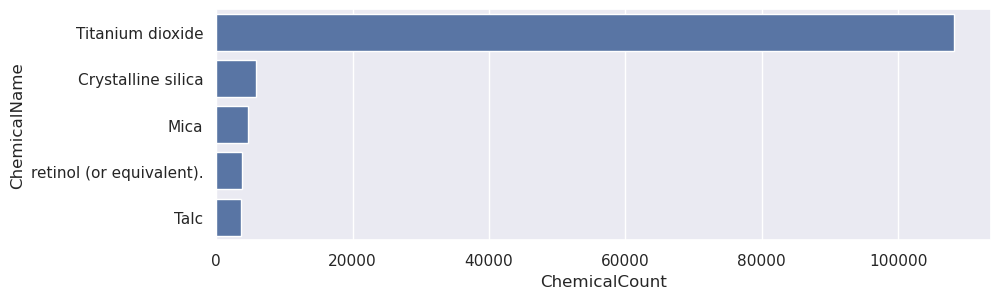

In [20]:
chem_name = chem.groupby(['ChemicalName'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount', ascending=False).head()

sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(y='ChemicalName', x='ChemicalCount', data= chem_name)

# Brands with the highest Chemical count

<AxesSubplot: xlabel='ChemicalCount', ylabel='BrandName'>

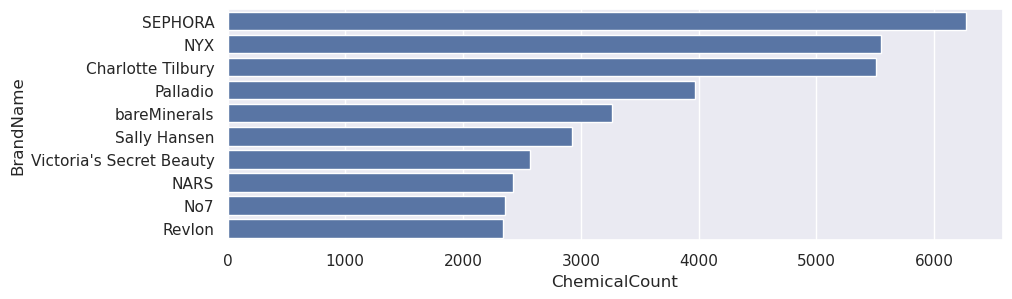

In [27]:
brand_chem = chem.groupby(['BrandName'], as_index=False)['ChemicalCount'].sum()\
                 .sort_values(by='ChemicalCount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (10, 3)})
sns.barplot(y='BrandName', x='ChemicalCount', data=brand_chem)

# Brands with the lowest Chemical count

<AxesSubplot: xlabel='ChemicalCount', ylabel='BrandName'>

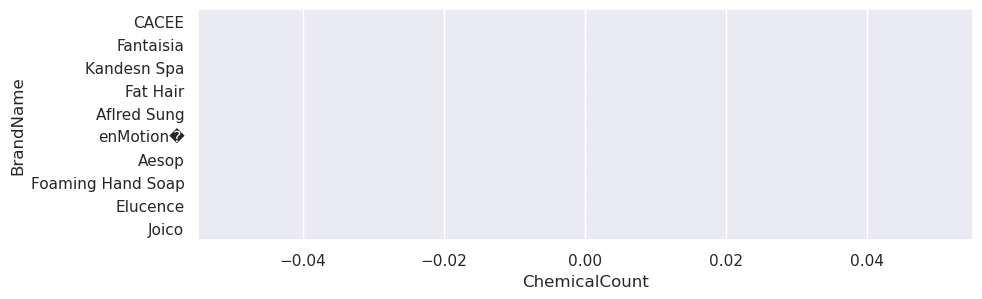

In [26]:
brand_chem = chem.groupby(['BrandName'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount',ascending=True).head(10)

sns.set(rc={'figure.figsize':(10,3)})
sns.barplot(y='BrandName', x='ChemicalCount', data= brand_chem)

# Chemical count in Product Categories

<AxesSubplot: xlabel='ChemicalCount', ylabel='PrimaryCategory'>

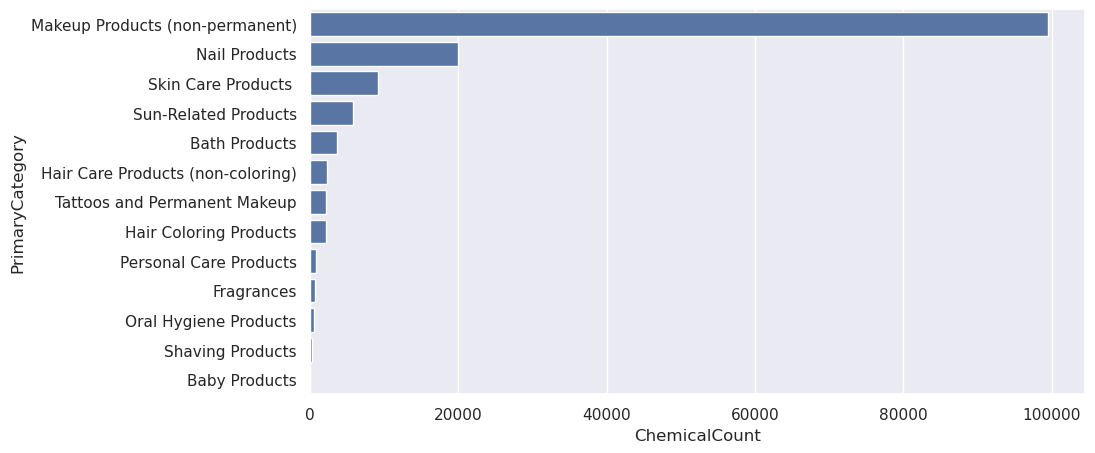

In [30]:
prod_cat = chem.groupby(['PrimaryCategory'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount',ascending=False)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y='PrimaryCategory', x='ChemicalCount', data= prod_cat)

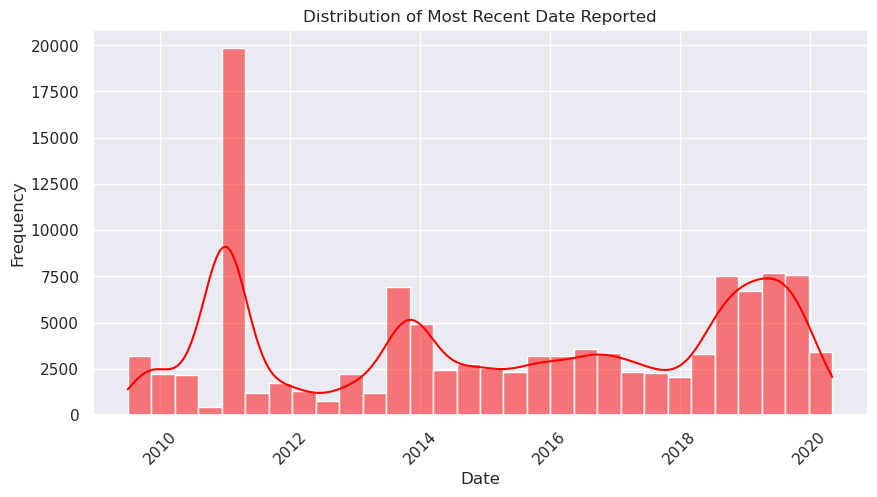

In [40]:
# distribution of report dates
plt.figure(figsize=(10,5))
sns.histplot(chem['MostRecentDateReported'], bins=30, kde=True, color='red')  # kde=True for a smooth curve
plt.title('Distribution of Most Recent Date Reported')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

These are the dates at which the data about these brands were collected.